![This is an image](Quant-Trading.jpg)

In [1]:
import warnings
warnings.filterwarnings('ignore')

from __future__ import division
from numpy import *
from pylab import *
from numpy.random import rand
import scipy.stats

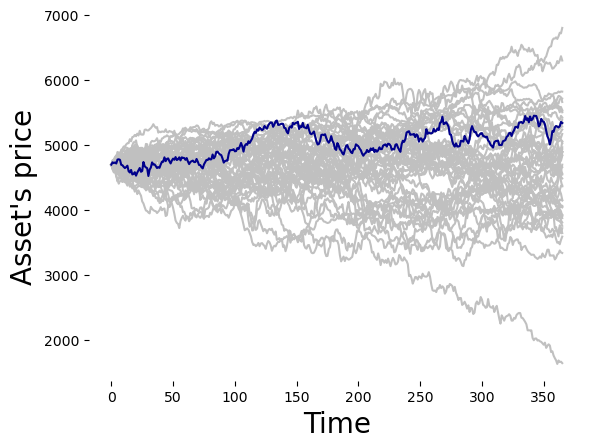

In [2]:
#Heston process simulation


norminv = scipy.stats.distributions.norm.ppf         
norm = scipy.stats.distributions.norm.cdf
M = 100               #Number of paths
d = 365                #Number of steps

T=1                    #Time to maturity
delta_t = T/d

y1 = rand(M,d)
y2 = rand(M,d)
y3 = rand(M,d)
z1 = norminv(y1)
z2 = norminv(y2)

spot = 4700          #Spot
r = 0.002            #Interest rate
sigma = 0.29         #Volatility of volatility
rho = -0.75          #Correlation spot-vol
sigma1 = rho*sigma   #Relationship to generate two independent brownian motions
sigma2 = sqrt(sigma**2-sigma1**2)
kappa = 0.5          #Mean reversion constant for vol process
theta = 0.0725        #Long run variance
variance = 0.026     #Initial variance
# strike = 4700        #strike de la opción
# barrier = spot*0.8

initial_spot_asset=spot*ones((M,1))
initial_variance_asset=variance*ones((M,1))

ASSET = zeros((M,d))
ASSET = append(initial_spot_asset,ASSET,axis=1) 

ASSET_VARIANCE = zeros((M,d))
ASSET_VARIANCE = append(initial_variance_asset,ASSET_VARIANCE,axis=1) 



for i in range(0,M):
    for j in range(0,d):
        if y3[i,j] > 0.5:
            epsilon = delta_t            
        else: 
             epsilon = -delta_t             
        
        
        ASSET[i,j+1] = ASSET[i,j]*(1+r*delta_t + sqrt(abs(ASSET_VARIANCE[i,j]))*sqrt(delta_t)*z1[i,j]) \
                        +0.5*r**2*ASSET[i,j]*delta_t**2   \
                        +((r+0.25*(sigma1-kappa)*ASSET[i,j]*sqrt(abs(ASSET_VARIANCE[i,j])))+ (0.25*(kappa-theta) - 0.0625*sigma**2 )*(ASSET[i,j]/sqrt(abs(ASSET_VARIANCE[i,j])))  ) * sqrt(delta_t) * z1[i,j] * delta_t       \
                        +0.5*ASSET[i,j]*(ASSET_VARIANCE[i,j]+0.5*sigma1)*(delta_t*z1[i,j]**2-delta_t) + 0.25*sigma2*ASSET[i,j]*(sqrt(delta_t)*z2[i,j]*sqrt(delta_t)*z1[i,j]+epsilon)  
        
        ASSET_VARIANCE[i,j+1] = kappa*theta*delta_t + (1 - kappa*delta_t)*abs(ASSET_VARIANCE[i,j]) \
                                + sqrt(abs(ASSET_VARIANCE[i,j])) * (sigma1*sqrt(delta_t)*z1[i,j] + sigma2*sqrt(delta_t)*z2[i,j]) - 0.5*kappa**2*(theta - abs(ASSET_VARIANCE[i,j]) ) * delta_t**2    \
                                + ( (0.25*kappa*theta -0.0625*sigma**2)/sqrt(abs(ASSET_VARIANCE[i,j]))  - 1.5*kappa* sqrt(abs(ASSET_VARIANCE[i,j])) ) * (sigma1*sqrt(delta_t)*z1[i,j] + sigma2*sqrt(delta_t)*z2[i,j]  )*delta_t   \
                                +0.25*sigma1**2*(delta_t*z1[i,j]**2-delta_t) + 0.25* sigma2**2*(delta_t*z2[i,j]**2-delta_t) + 0.5*sigma1*sigma2*sqrt(delta_t)*z1[i,j]*z2[i,j]


#Plot the paths        
plt.plot(ASSET[0:50,:].transpose(),c='silver')
plt.plot(ASSET[0:1,:].transpose(),c='darkblue')
ylabel("Asset's price",fontsize=20)
xlabel("Time",fontsize=20)
box(on=None)

show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)